In [1]:
# Importing the necessary libraries
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from pylab import *

from IPython import display

import random
import timeit

In [2]:
%matplotlib inline
plt.rcParams['animation.ffmpeg_path'] = '/Library/anaconda3/bin/ffmpeg'

In [3]:
start = timeit.default_timer() # To measure the run time of the code
size = 400

In [4]:
def animate(S, a, b, step):
    fig = plt.figure()
    ax = fig.add_subplot()
    
    im = ax.imshow(S[0], cmap = plt.get_cmap('Greys'))

    tight_layout()


    def update_img(n):
        im.set_data(S[n])
        return im

    ani = animation.FuncAnimation(fig, update_img,
                                  frames = int(ceil((b - a)/step)), interval=1000)
    

    video = ani.to_html5_video()
    html = display.HTML(video)
    display.display(html)
    plt.close()

In [5]:
def initialize():
    s = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            s[i,j] = random.choice([-1, 1])
    return s

In [6]:
def DeltaU(i, j, s):
    if i == 0:
        top = s[size - 1, j]
    else:
        top = s[i - 1, j]
    
    if i == size - 1:
        bottom = s[0, j]
    else:
        bottom = s[i + 1, j]
    
    if j == 0:
        left = s[i, size - 1]
    else:
        left = s[i, j - 1]
        
    if j == size - 1:
        right = s[i, 0]
    else:
        right = s[i, j + 1]
        
    return 2 * s[i, j] * (top + bottom + left + right)

In [7]:
def main(T):
    s = initialize()

    for iteration in range(100 * size**2):
        i = int(random.random() * size)
        j = int(random.random() * size)

        Edif = DeltaU(i, j, s)
        if Edif <= 0:
            s[i, j] = -s[i, j]
        elif random.random() < np.exp(-Edif/T):
            s[i, j] = -s[i, j]
            
    return s

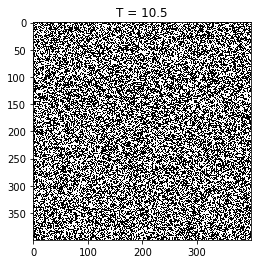

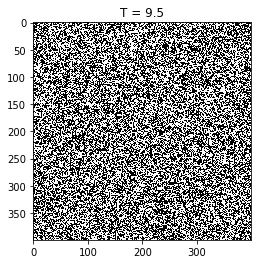

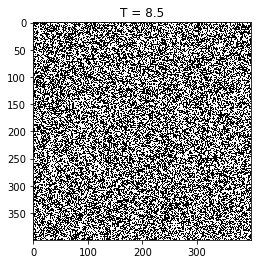

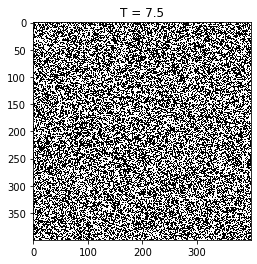

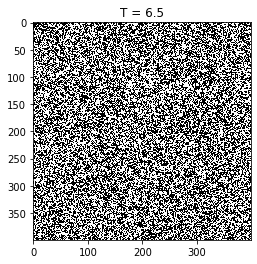

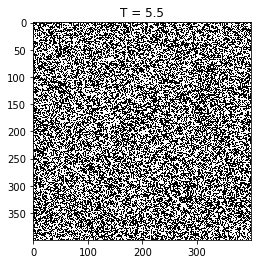

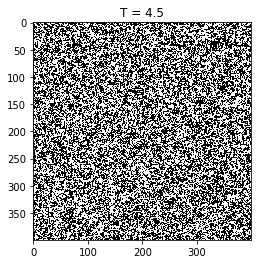

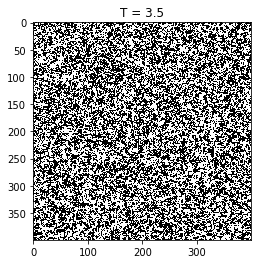

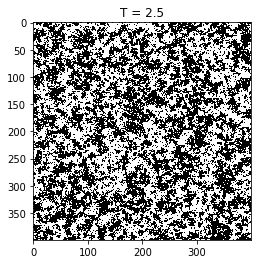

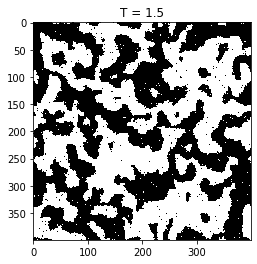

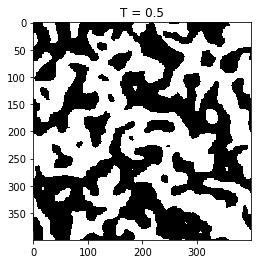

In [8]:
S = []
a = 10.5
b = 0
step = -1
for T in np.arange(a, b, step):
    x = 1
    s = main(T)
    S.append(s)
    
    plt.imshow(s, cmap = plt.get_cmap('Greys'))
    plt.title("T = %1.1f" % T)
    plt.show();

In [9]:
animate(S, a, b, step)

In [10]:
end = timeit.default_timer()
print("Running time:")
print(end-start, 'seconds')
print((end-start)/60, 'minutes')

Running time:
751.0691473339999 seconds
12.517819122233332 minutes
